# Матричный шифр
Импорты, алфавит и ключ

In [1]:
from colorama import Fore as text_color
import numpy as np
from utils.data_io import get_test_case, get_matrix_key

alphabet = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
key = get_matrix_key()

Функция шифрования

In [9]:
def matrix(string: str, matrix_key: list[list[int]], alphabet: str = alphabet):
    alphabet = alphabet.upper()
    new_str = ''
    for i in range(0, len(string), 3):
        block = string[i:i + 3]
        if len(block) < 3:
            block += 'Я' * (3 - len(block))

        block_matrix = np.array([[alphabet.index(char) + 1 for char in block]]).T
        encrypted_block_matrix = np.dot(matrix_key, block_matrix)
        
        for num in encrypted_block_matrix.flatten():
            new_str += '{:03d}'.format(num)
    return new_str

Функция расшифрования

In [10]:
def matrix_decrypt(encrypted_text, matrix_key: list[list[int]], alphabet: str = alphabet):
    alphabet = alphabet.upper()
    inverse_matrix_key = np.linalg.inv(matrix_key)
    new_str = ''
    for i in range(0, len(encrypted_text), 9):
        block = encrypted_text[i:i + 9]
        block_nums = [int(block[j:j + 3]) for j in range(0, 9, 3)]
        block_matrix = np.array(block_nums).reshape((3, 1))
        decrypted_block_matrix = np.dot(inverse_matrix_key, block_matrix)
        
        for num in decrypted_block_matrix.flatten():
            new_str += alphabet[int(round(num)) - 1]

    return new_str

Проверка

In [13]:
try:
    open_text = 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИННЫМИНОЖАМИХОДЯТТЧК'
    encrypted_text = matrix(open_text, matrix_key=key)
    decrypted_text = matrix_decrypt(encrypted_text, matrix_key=key)

    assert encrypted_text == '062090153194134257190160255143050112161091158267263425127181277160127223230264401185155255115054116217211327285277413203247385', 'Зашифрованный текст не совпадает с образцом'
    assert open_text == decrypted_text, 'Расшифрованный текст не совпадает с изначальным'
    print(f'{text_color.LIGHTGREEN_EX}Шифрование корректно{text_color.RESET}')
except AssertionError as e:
    print(f'{text_color.LIGHTRED_EX}Шифрование не корректно: {e}{text_color.RESET}')

Шифрование корректно


Сравнение гистограмм до шифрования и после

Открытый текст


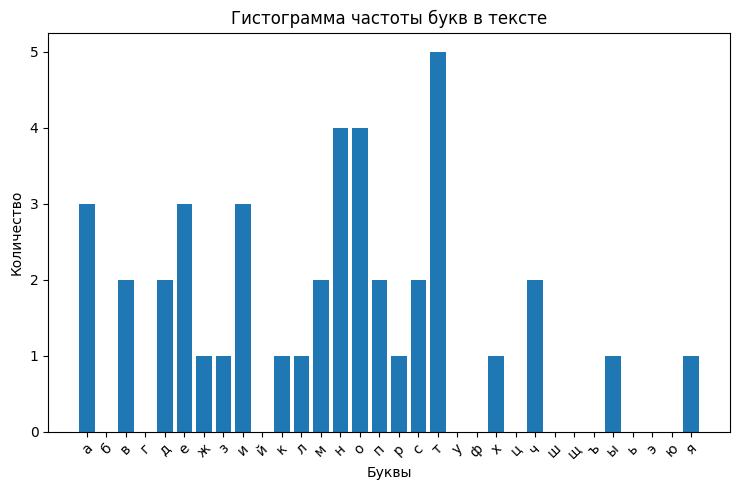

Зашифрованный текст


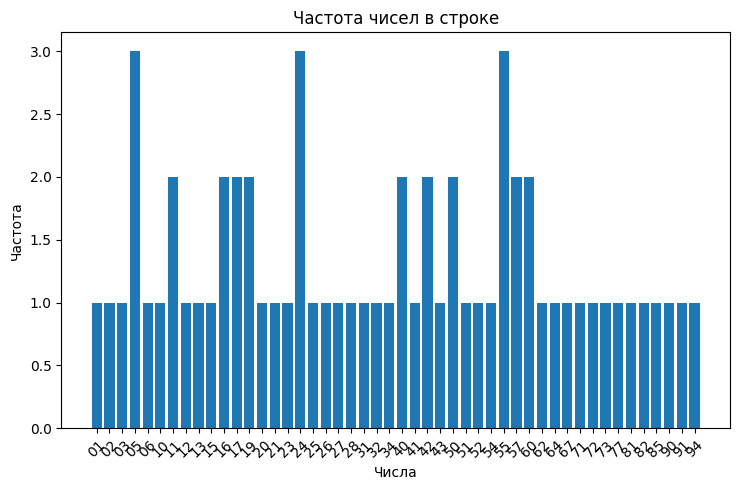

In [16]:
from utils.gist import plot_letter_count, plot_number_count

print('Открытый текст')
plot_letter_count(open_text)
print('Зашифрованный текст')
plot_number_count(' '.join([encrypted_text[i] + encrypted_text[i + 1] for i in range(0, len(encrypted_text), 2)]))

Ввод строки для шифрования

In [17]:
open_text = input('Введите открытый текст для шифрования: ')
encrypted_text = matrix(open_text, matrix_key=key)
print(encrypted_text)

151170264212211342080133182313190367


Ввод строки для расшифрования

In [19]:
encrypted_text = input('Введите текст для расшифрования: ')
decrypted_text = matrix_decrypt(encrypted_text, matrix_key=key)
print(decrypted_text)

КРИПТОГРАФИЯ
